# **1. 데이터 로더(Data Loader)**
* 데이터의 양이 많을 때 배치 단위로 학습하는 방법을 제공

<center><img src='https://i.imgur.com/t83RUtL.png' width='700'></center>

# **2. 손글씨 인식 모델 만들기**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.transforms as tranforms
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [3]:
digits = load_digits()

X_data = digits['data']
y_data = digits['target']

print(X_data.shape)
print(y_data.shape)

(1797, 64)
(1797,)


In [4]:
import matplotlib.pyplot as plt

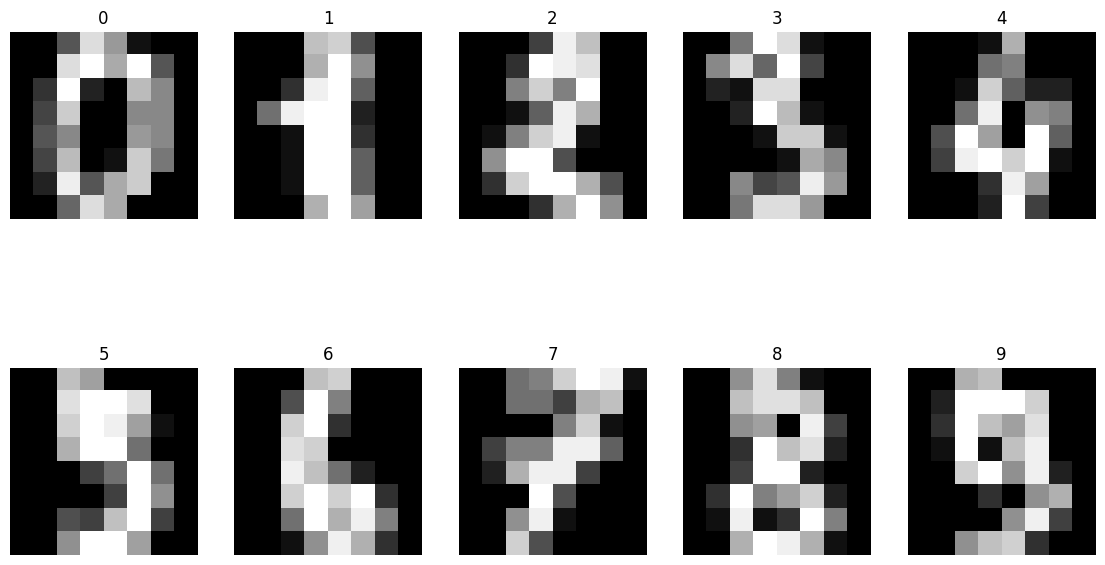

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 8))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_data[i].reshape((8, 8)), cmap='gray')
    ax.set_title(y_data[i])
    ax.axis('off')

In [6]:
X_data = torch.FloatTensor(X_data)
y_data = torch.LongTensor(y_data)

print(X_data.shape)
print(y_data.shape)

torch.Size([1797, 64])
torch.Size([1797])


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2024)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([1437, 64]) torch.Size([1437])
torch.Size([360, 64]) torch.Size([360])


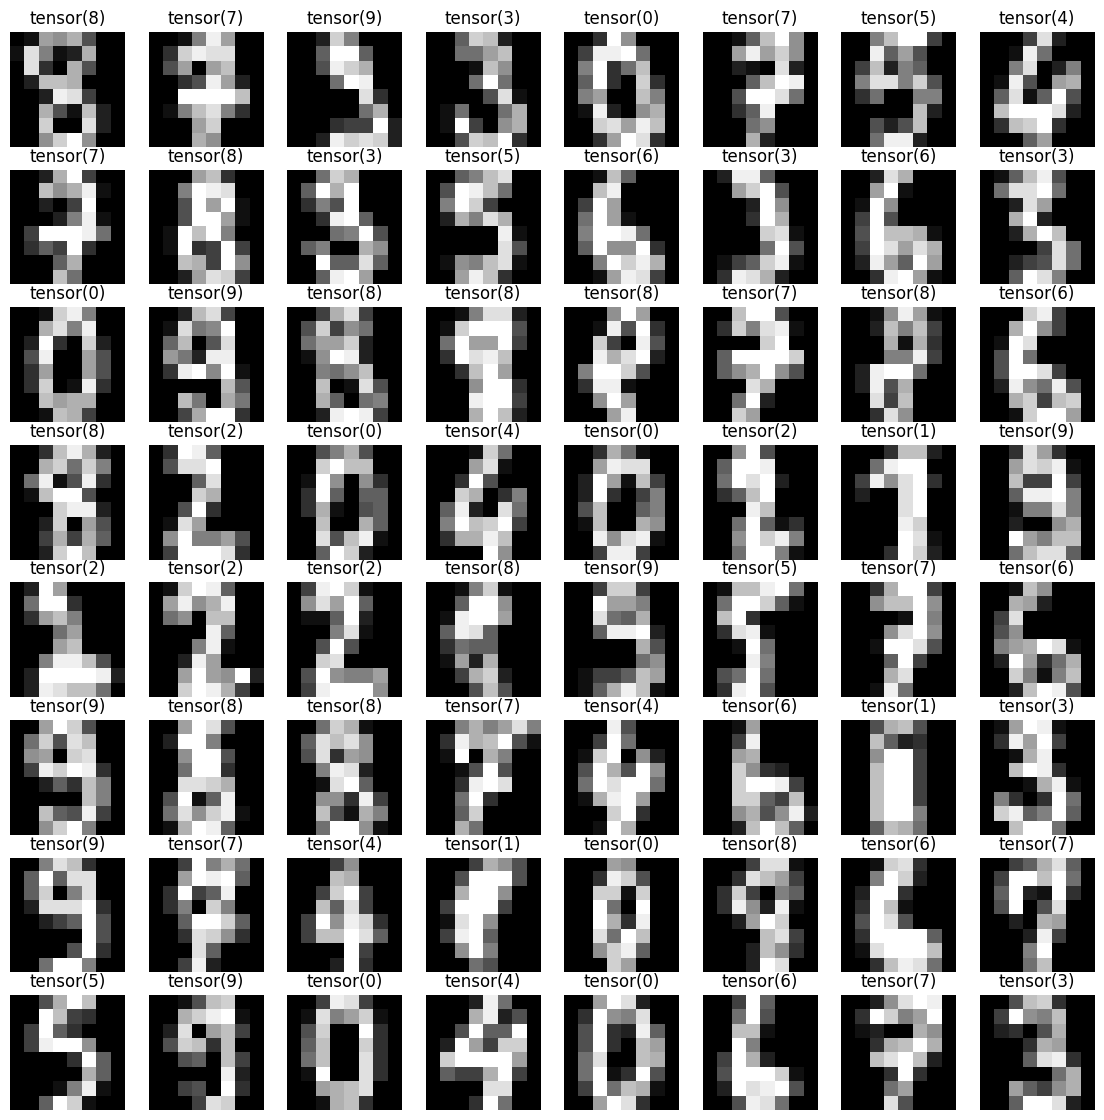

In [9]:
loader = torch.utils.data.DataLoader(
    dataset=list(zip(x_train, y_train)),
    batch_size=64,
    shuffle = True,
    drop_last=False  # False가 기본값
)

imgs, labels = next(iter(loader))
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(14, 14))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((8, 8)), cmap='gray')
    ax.set_title(str(label))
    ax.axis('off')

In [10]:
model = nn.Sequential(
    nn.Linear(64, 10)
)

optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 50
for epoch in range(epochs + 1):
    sum_losses = 0
    sum_accs = 0

    for x_batch, y_batch in loader:
        y_pred = model(x_batch)
        loss = nn.CrossEntropyLoss()(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_losses = sum_losses + loss

        # 배치 단위 정확도 저장
        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
        sum_accs = sum_accs + acc

    avg_loss = sum_losses / len(loader)
    avg_acc = sum_accs / len(loader)
    print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')

Epoch    0/50 Loss: 1.665983 Accuracy: 59.81%
Epoch    1/50 Loss: 0.316703 Accuracy: 89.54%
Epoch    2/50 Loss: 0.216459 Accuracy: 92.85%
Epoch    3/50 Loss: 0.160636 Accuracy: 94.97%
Epoch    4/50 Loss: 0.117757 Accuracy: 96.06%
Epoch    5/50 Loss: 0.106689 Accuracy: 96.59%
Epoch    6/50 Loss: 0.092492 Accuracy: 97.27%
Epoch    7/50 Loss: 0.090200 Accuracy: 96.94%
Epoch    8/50 Loss: 0.081015 Accuracy: 96.79%
Epoch    9/50 Loss: 0.070047 Accuracy: 98.08%
Epoch   10/50 Loss: 0.052998 Accuracy: 98.98%
Epoch   11/50 Loss: 0.048407 Accuracy: 99.18%
Epoch   12/50 Loss: 0.047379 Accuracy: 98.97%
Epoch   13/50 Loss: 0.043256 Accuracy: 98.88%
Epoch   14/50 Loss: 0.041541 Accuracy: 99.12%
Epoch   15/50 Loss: 0.034340 Accuracy: 99.39%
Epoch   16/50 Loss: 0.031823 Accuracy: 99.46%
Epoch   17/50 Loss: 0.035155 Accuracy: 98.91%
Epoch   18/50 Loss: 0.031698 Accuracy: 99.46%
Epoch   19/50 Loss: 0.030093 Accuracy: 99.32%
Epoch   20/50 Loss: 0.026923 Accuracy: 99.51%
Epoch   21/50 Loss: 0.031647 Accur

tensor(7)


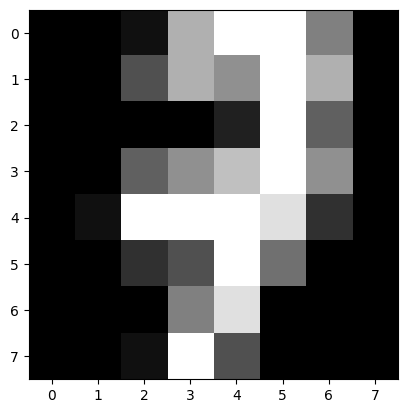

In [11]:
plt.imshow(x_test[10].reshape((8,8)),cmap='gray')
print(y_test[10])

In [12]:
y_pred=model(x_test)
y_pred[10]  # 값

tensor([ -7.9888,  -1.2901, -12.2065,  -2.3912,  -2.9138,  -6.7122, -13.1578,
         12.5001,  -0.1856,   3.4744], grad_fn=<SelectBackward0>)

In [13]:
y_prob = nn.Softmax(1)(y_pred)
y_prob[10]   # 확률

tensor([1.2640e-09, 1.0255e-06, 1.8621e-11, 3.4097e-07, 2.0220e-07, 4.5303e-09,
        7.1924e-12, 9.9988e-01, 3.0947e-06, 1.2026e-04],
       grad_fn=<SelectBackward0>)

In [14]:
for i in range(10):
  print(f'숫자 {i}일 확률:{y_prob[10][i]:.2f}')

숫자 0일 확률:0.00
숫자 1일 확률:0.00
숫자 2일 확률:0.00
숫자 3일 확률:0.00
숫자 4일 확률:0.00
숫자 5일 확률:0.00
숫자 6일 확률:0.00
숫자 7일 확률:1.00
숫자 8일 확률:0.00
숫자 9일 확률:0.00


In [15]:
y_pred_index = torch.argmax(y_prob, axis=1)
accuracy = (y_test == y_pred_index).float().sum()/len(y_test)*100
print(f'테스트 정확도는 {accuracy:.2f}%입니다!')

테스트 정확도는 95.83%입니다!
